# 3. Bank_Churnrate_EDA<a id='2_Data_wrangling'></a>

## 3.1 Table of Contents<a id='2.1_Contents'></a>
* 3. Bank_Churnrate_EDA
  * 3.1 Table of Contents
  * 3.2 Introduction
  * 3.3 Imports
  * 3.4 Load Supply Chain Train Data
  * 3.5 Explore The Data
    * 2.5.1 Number Of Missing Values By Column & Assessing the Data
    * 2.5.2 Categorical Features
      * 2.5.2.1 Unique Categorical Data
      * 2.5.2.2 Assessing User Base
    * 2.5.3 Numeric Features
      * 2.5.3.1 Numeric data summary
      * 2.5.3.2 Distributions Of Feature Values
  * 2.6 Target Feature (Attrition Flag)
    * 2.11.1 Number Of Missing Values By Row - Resort
  * 2.7 Save data
  * 2.8 Summary


## 3.2 Introduction

Further Analysis will be conducted with the Bank Data Cleaned dataset to glean any further insights regarding correlation with the determined feature value of "Attrition_Flag" column along with determining any noteworthy relationships regarding churned vs. not churned people groups.

## 3.3 Imports<a id='2.3_Imports'></a>

Importing all appropriate packages in order to perform further EDA for the previously "cleaned" dataset.

In [38]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## 2.4 Load Bank Churn Cleaned Data

In [39]:
#Dropped first column since it was unnamed and repeat of train_idx
#Code to remove the first column for the dataset: https://www.statology.org/drop-unnamed-column-pandas/
bank_clean_df = pd.read_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_data_train_clean.csv', index_col=0)

Auditing the dataset with .info() and .head() displaying the first few records.

In [40]:
#info method on bank_clean_df to see a summary of the data
bank_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 0 to 8100
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   train_idx                 8101 non-null   int64  
 1   CLIENTNUM                 8101 non-null   int64  
 2   Customer_Age              8101 non-null   int64  
 3   Gender                    8101 non-null   object 
 4   Dependent_count           8101 non-null   int64  
 5   Education_Level           6896 non-null   object 
 6   Marital_Status            7522 non-null   object 
 7   Income_Category           7212 non-null   object 
 8   Card_Category             8101 non-null   object 
 9   Months_on_book            8101 non-null   int64  
 10  Total_Relationship_Count  8101 non-null   int64  
 11  Months_Inactive_12_mon    8101 non-null   int64  
 12  Contacts_Count_12_mon     8101 non-null   int64  
 13  Credit_Limit              8101 non-null   float64
 14  Total_Re

In [41]:
#head method on bank_clean_df to print the first several rows of the data
bank_clean_df.head()

,train_idx,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,0,713071383,54,F,1,NaN,Single,NaN,Blue,36,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,1,714246333,58,F,4,High School,Married,NaN,Blue,48,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,2,718206783,45,F,4,NaN,Single,Less than $40K,Gold,36,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [42]:
bank_clean_df.shape

(8101, 22)

## 3.5 Explore The Data

### 3.5.1 Number & Handling Of Missing Values 

Count the number of missing values in each column and sort them.

In [43]:
#The statement below came from the ski_data project but is used here as well to calculate number and percent
#of missing values in the dataset.

missing = pd.concat([bank_clean_df.isnull().sum(), 100 * bank_clean_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
Education_Level,1205,14.874707
Income_Category,889,10.973954
Marital_Status,579,7.147266
train_idx,0,0.000000
Credit_Limit,0,0.000000
Avg_Utilization_Ratio,0,0.000000
Total_Ct_Chng_Q4_Q1,0,0.000000
Total_Trans_Ct,0,0.000000
Total_Trans_Amt,0,0.000000
Total_Amt_Chng_Q4_Q1,0,0.000000


Looking at the dataset: Education Level, Income Category, and Maritial status have null records with about 15% null in Education Level.

In order to properly handle these missing values for EDA, these missing values will be removed in the dataset and the remaining data will be assessed and used for training predictive models.

In [46]:
bank_clean_dropna = bank_clean_df.dropna()
bank_clean_dropna.shape

(5690, 22)

In [48]:
print(f"Percent of data still left after dropping NA values: {round(100 * len(bank_clean_dropna)/len(bank_clean_df), 2)}%")

Percent of data still left after dropping NA values: 70.24%


### 3.5.2 Determing Correlation of Features with Target Feature ("Attrition_Flag")

Finally displaying a correlation heatmap to describe relationships of features within the dataset according to the Attrition Flag column which describes which customers have churned or not churned from the dataset.

C:\Users\tpooz\AppData\Local\Temp\ipykernel_29324\983226656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = bank_clean_dropna.corr()


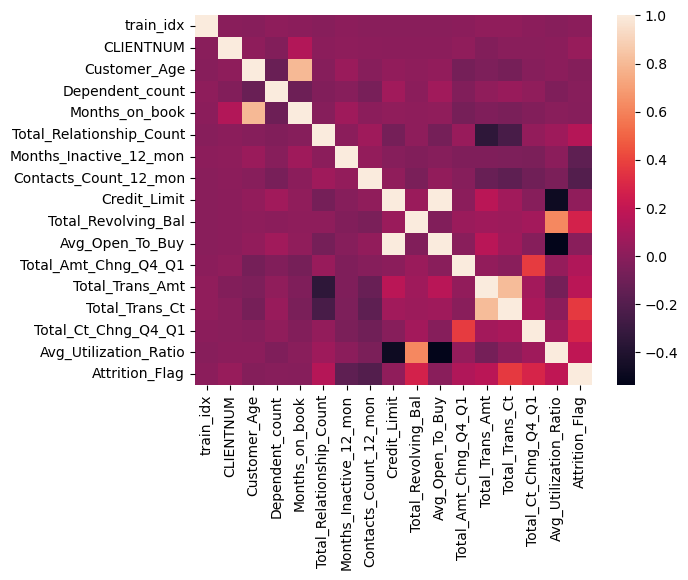

In [49]:
corr = bank_clean_dropna.corr()
sns.heatmap(corr)
plt.show()

In [50]:
corr['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag              1.000000
Total_Trans_Ct              0.364835
Total_Ct_Chng_Q4_Q1         0.281174
Total_Revolving_Bal         0.268979
Avg_Utilization_Ratio       0.185690
Total_Trans_Amt             0.170178
Total_Relationship_Count    0.149125
Total_Amt_Chng_Q4_Q1        0.133285
CLIENTNUM                   0.041906
Credit_Limit                0.017750
train_idx                   0.002180
Avg_Open_To_Buy            -0.006245
Dependent_count            -0.008122
Months_on_book             -0.018599
Customer_Age               -0.024498
Months_Inactive_12_mon     -0.160701
Contacts_Count_12_mon      -0.203447
Name: Attrition_Flag, dtype: float64

It seems viewing just the numeric data for the dataset, that Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, and Total_Amt_Chng_Q4_Q1 all have moderate positive correlation with Attrition Flag column; whereas Contacts_Count_12_mon and Months_Inactive_12_mon have some moderate negative correlation. 

#### 2.5.2.1 Determine User Base Churn vs. Not Churned

It might be helpful as well to understand the userbase of customers who churned vs. not churned in the dataset as well as to get a count to determine the level of imbalance in the dataset for future steps in developinga predictive model.

In [56]:
#Retrieive data for customers who did not churn
bank_current = bank_clean_dropna[bank_clean_dropna['Attrition_Flag'] == 1]
len(bank_current)

4800

In [57]:
#Retrieve data for customers who churned
bank_churn = bank_clean_dropna[bank_clean_dropna['Attrition_Flag'] == 0]
len(bank_churn)

890

In [59]:
print(f"Total Percent for customers who have churned based on further 'cleaned' dataset: {round(100 * len(bank_churn)/len(bank_clean_df),2)}%")

Total Percent for customers who have churned based on further 'cleaned' dataset: 10.99%


Now given the two datsets for customers churned vs. not churned, we can plot histograms for these two distributions to determine the userbase for each groups regarding the categorical variable.

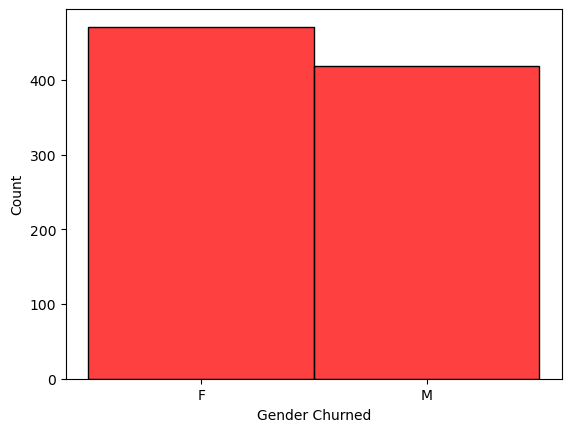

In [60]:
#Identifying color for plot code found on: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=bank_churn, x='Gender', color= 'r')
plt.xlabel("Gender Churned")
plt.show()

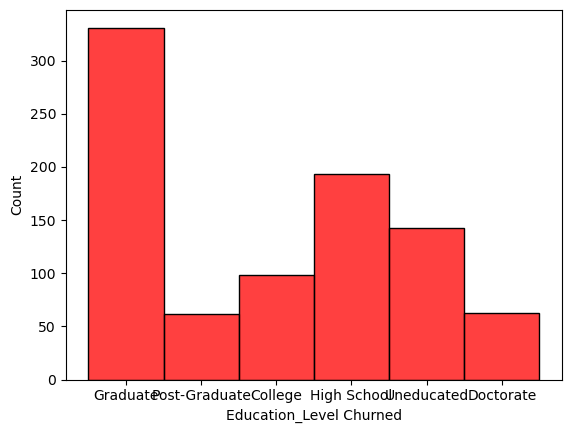

In [61]:
sns.histplot(data=bank_churn , x='Education_Level', color='r')
plt.xlabel("Education_Level Churned")
plt.show()

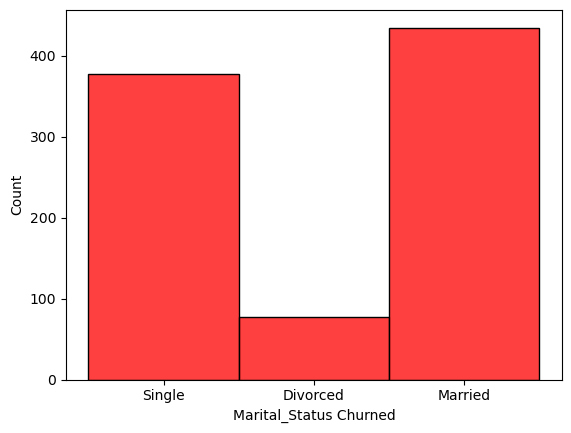

In [62]:
sns.histplot(data=bank_churn , x='Marital_Status', color='r')
plt.xlabel("Marital_Status Churned")
plt.show()

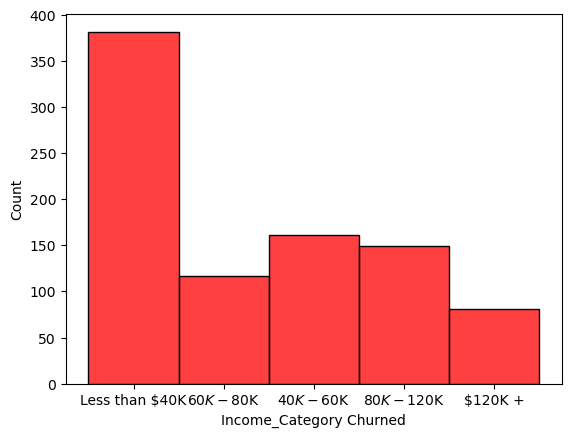

In [63]:
sns.histplot(data=bank_churn , x='Income_Category', color='r')
plt.xlabel("Income_Category Churned")
plt.show()

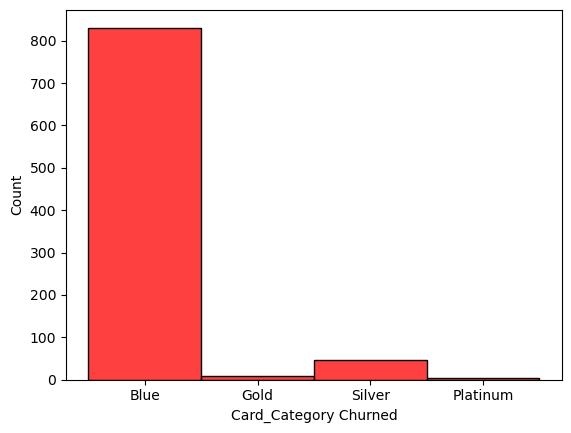

In [64]:
sns.histplot(data=bank_churn , x='Card_Category', color='r')
plt.xlabel("Card_Category Churned")
plt.show()

Based upon this churned dataset assessment, it seems that the more common users from the churned sample are previous female users, graduate users, users who are either married or single, users making less than 40k, and users who are in the more common Blue category card holders. So from an intial glance, it seems that perhaps marketing or applying strategies to accomodate users who are making annually less thank 40k might mitigate churn. 

Created the same above histplots for dataset of customers "not churned":

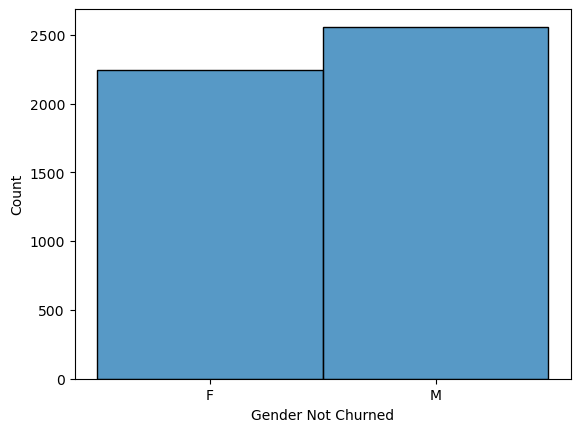

In [65]:
sns.histplot(data=bank_current, x='Gender')
plt.xlabel("Gender Not Churned")
plt.show()

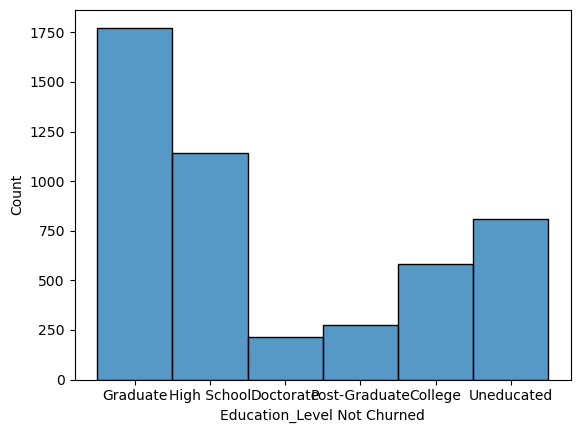

In [66]:
sns.histplot(data=bank_current , x='Education_Level')
plt.xlabel("Education_Level Not Churned")
plt.show()

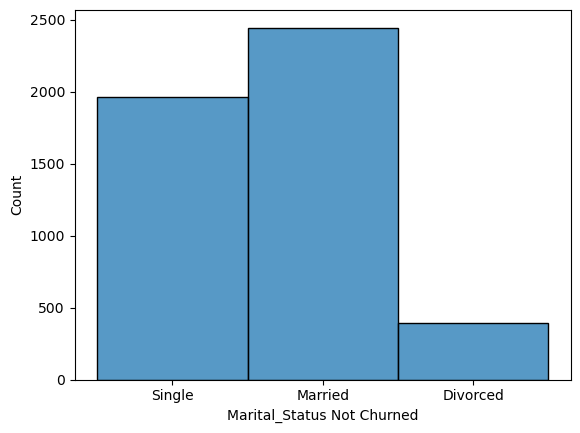

In [67]:
sns.histplot(data=bank_current , x='Marital_Status')
plt.xlabel("Marital_Status Not Churned")
plt.show()

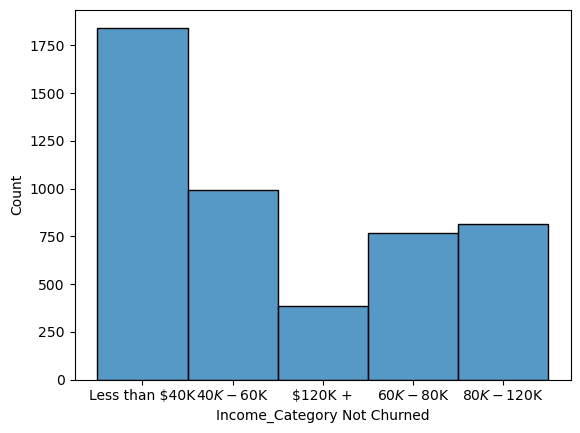

In [68]:
sns.histplot(data=bank_current , x='Income_Category')
plt.xlabel("Income_Category Not Churned")
plt.show()

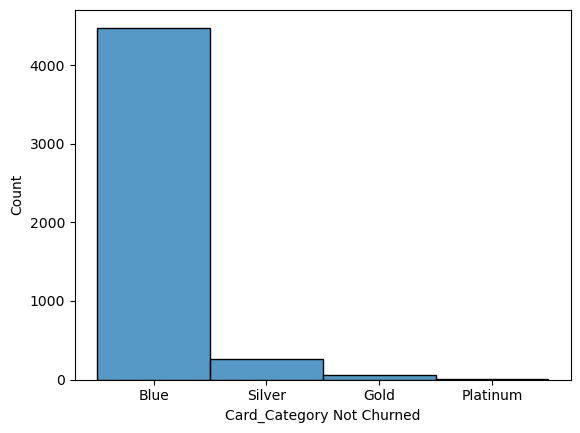

In [69]:
sns.histplot(data=bank_current , x='Card_Category')
plt.xlabel("Card_Category Not Churned")
plt.show()

Viewing the analysis of samples for users who are current or who have not churned, it seems even here these are users that are slightly more female than male, who are graduates, married, who are also in a lower income bracket of less than 40k, and blue or common card holders. Therefore, further analysis will be needed to truly assess what are the correlated features to the target of Attrition Flag.

#### 3.5.2.2 One-Hot Encoding & Correlation with Categorical Features

Now, will modify the categorical variables with one-hot encoding in order to create numeric values to be used in future modeling as well as creating a correlation object in order to see if categorical variables as well are in any correlation with the "Attrition_Flag" target feature values.

In [25]:
#Apply pd.get_dummies() for one-hot encoding for cateogorical feature values
bank_clean_numeric = pd.get_dummies(bank_clean_df)
bank_clean_numeric.head()

,train_idx,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,713071383,54,1,36,1,3,3,3723.0,1728,...,1,0,0,0,0,0,1,0,0,0
1,1,714246333,58,4,48,1,4,3,5396.0,1803,...,0,0,0,0,0,0,1,0,0,0
2,2,718206783,45,4,36,6,1,3,15987.0,1648,...,1,0,0,0,0,1,0,1,0,0
3,3,721096983,34,2,36,4,3,4,3625.0,2517,...,1,0,0,0,0,1,1,0,0,0
4,4,720028683,49,2,39,5,3,4,2720.0,1926,...,0,0,1,0,0,0,1,0,0,0


In [26]:
#Further "cleaning" for the dataset to be done, in order to remove seemingly unrelated columns affecting "Attrition_Flag" column
#Namely dropping train_idx since this is an index for training set, and CLIENTNUM since this is just assorted numbers describing the specific users
#Code to drop named columns: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/#
numeric_dropped = bank_clean_numeric.drop(['train_idx' , 'CLIENTNUM'], axis=1)

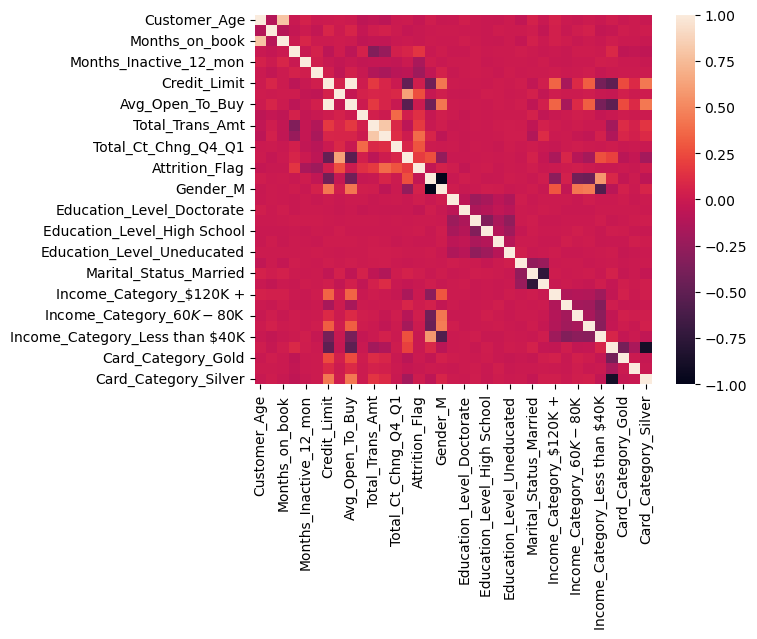

In [27]:
#Create correlation object for all numeric dataframe from bank_clean_data set in order to assess correlations with Attrition Flag.
corr_numeric = numeric_dropped.corr()
sns.heatmap(corr_numeric)
plt.show()

In [28]:
corr_numeric['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag                    1.000000
Total_Trans_Ct                    0.380618
Total_Ct_Chng_Q4_Q1               0.288937
Total_Revolving_Bal               0.263335
Avg_Utilization_Ratio             0.179838
Total_Trans_Amt                   0.178078
Total_Relationship_Count          0.150889
Total_Amt_Chng_Q4_Q1              0.128559
Gender_M                          0.047382
Income_Category_$60K - $80K       0.026338
Credit_Limit                      0.024437
Education_Level_College           0.018937
Marital_Status_Married            0.017872
Income_Category_$40K - $60K       0.015050
Card_Category_Silver              0.014854
Education_Level_High School       0.009930
Education_Level_Uneducated        0.006614
Income_Category_$80K - $120K      0.005148
Education_Level_Graduate          0.004847
Avg_Open_To_Buy                   0.000803
Income_Category_$120K +          -0.000831
Card_Category_Gold               -0.003397
Marital_Status_Divorced          -0.006305
Card_Catego

It seems looking at the above list, that the strong positive correlations come from feature values in the Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, and Total_Amt_Chng_Q4_Q1 columns. There is an intuitive sense to this, as the customers spending pattern would seem to affect if the customer is in fact more likely to churn or not. However, what also seems of interest is that how many dependents the customer had also affect some of the variance with the Attrition_Flag column. 

The strong negative correlations comes from Contacts_Count_12_mon and Months_Inactive_12_mon which again intuitively can see that based on the customer spending or use pattern, seems to affect the overall "Attrition_Flag."

### 2.5.3 Numeric Features

#### 2.5.3.1 Numeric data summary

Scatterplots were created for each of the above feature values that either had a strong positive or negative correlation with 'Attrition_Flag' to view the degree of correlation. 

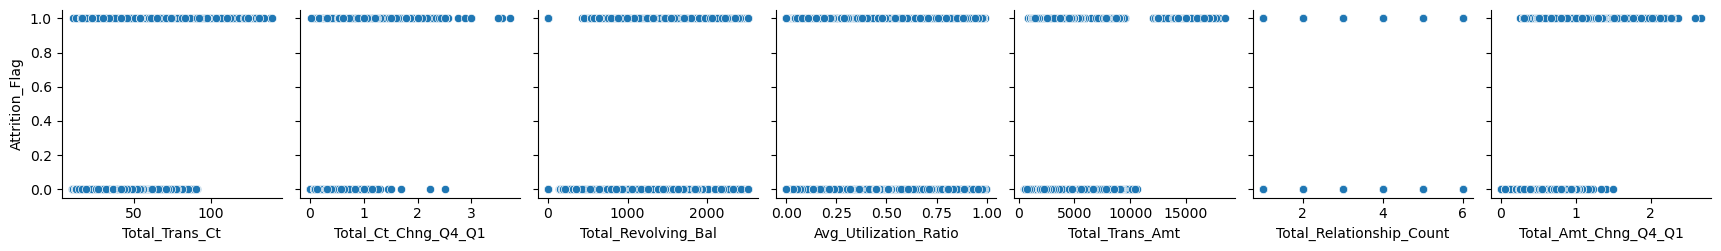

In [29]:
sns.pairplot(numeric_dropped, x_vars=["Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Total_Revolving_Bal", "Avg_Utilization_Ratio", "Total_Trans_Amt", "Total_Relationship_Count", "Total_Amt_Chng_Q4_Q1"], y_vars = ["Attrition_Flag"])

Handling Missing Values in Education_Level, Income_Category, and Marital_Status will be done by removing these columns from the dataset in order to prepare for model creation and assessment.  

In [30]:
remove_na_bank_df = numeric_dropped.dropna()

In [33]:
remove_na_bank_df.shape

(8101, 35)

In [31]:
remove_na_bank_df.isna().sum().sort_values(ascending=False)

Customer_Age                      0
Income_Category_$120K +           0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Divorced           0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$40K - $60K       0
Education_Level_Doctorate         0
Income_Category_$60K - $80K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $40K    0
Card_Category_Blue                0
Card_Category_Gold                0
Card_Category_Platinum            0
Education_Level_Graduate          0
Education_Level_College           0
Dependent_count                   0
Avg_Open_To_Buy                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Total_Amt_Chng_Q4_Q1              0
Gender_M                    

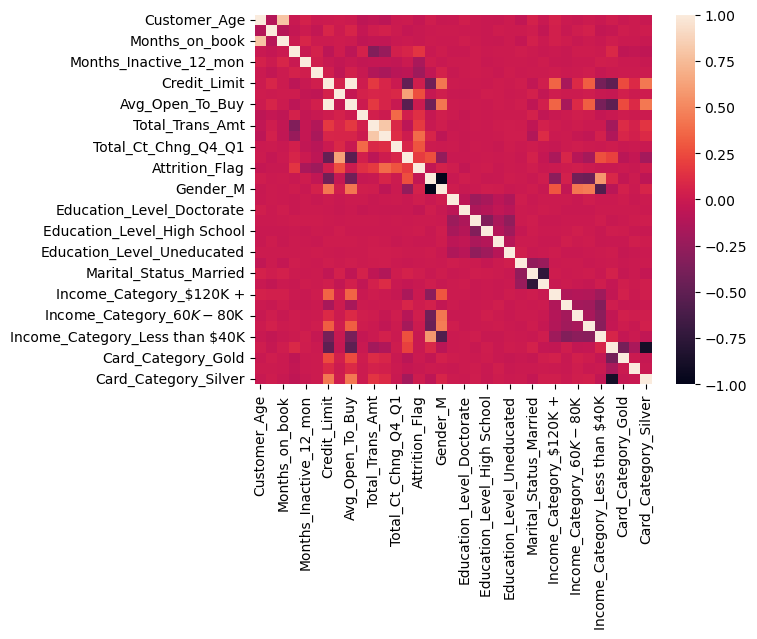

In [36]:
corr2= remove_na_bank_df.corr()
sns.heatmap(corr2)
plt.show()

In [37]:
corr2['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag                    1.000000
Total_Trans_Ct                    0.380618
Total_Ct_Chng_Q4_Q1               0.288937
Total_Revolving_Bal               0.263335
Avg_Utilization_Ratio             0.179838
Total_Trans_Amt                   0.178078
Total_Relationship_Count          0.150889
Total_Amt_Chng_Q4_Q1              0.128559
Gender_M                          0.047382
Income_Category_$60K - $80K       0.026338
Credit_Limit                      0.024437
Education_Level_College           0.018937
Marital_Status_Married            0.017872
Income_Category_$40K - $60K       0.015050
Card_Category_Silver              0.014854
Education_Level_High School       0.009930
Education_Level_Uneducated        0.006614
Income_Category_$80K - $120K      0.005148
Education_Level_Graduate          0.004847
Avg_Open_To_Buy                   0.000803
Income_Category_$120K +          -0.000831
Card_Category_Gold               -0.003397
Marital_Status_Divorced          -0.006305
Card_Catego

#### 2.5.3.2 Distributions Of Numeric Feature Values

## 2.6 Target Feature (Attrition Flag)

Attrition Flag column will be used as the target feature as this provides whether or not currently the customer has attrited from the bank and therefore what facotrs seem to be likely correlated with the column. 

From the correlation values listed above, it seems that customer attrition (attrition flag column) has some level of positive correlation with Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Total_Revolving_Bal, Avg_Utilization_Ratio, Total_Trans_Amt, Total_Relationship_Count, Total_Amt_Chng_Q4_Q1, Credit_Limit. There is some negative correlation with Attrition_Flag as well namely Contacts_Count_12_mon, Months_Inactive_12_mon, Customer_Age, Months_on_book, and Dependent_count to be further explored as well.    

## 2.7 Save data

In [83]:
bank_df.shape

(8101, 22)

In [77]:
# save the data to a new csv file
datapath = 'C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets'
bank_df.to_csv('C:/Users/tpooz/OneDrive/Desktop/Data_Science_BootCamp_2023/SpringBoard_Github/Bank-Churnrate/0_Datasets/bank_data_train_clean.csv')  

## 2.8 Summary

After a further analysis and "cleaning" of the dataset in order to transform non-numeric columns to numeric, there seesm to still be similar columns leading to stronger correlation for the Attrition Flag columns.  Also in terms of modeling, this will be a classification problem but will need to assess the appropriate classification model (Logistic Regression, Random Forest ensemble with bagging, Random Forest with boosting, etc.) and assess performance. 